# Snippets

In [93]:
import numpy as np
from scipy.linalg import eig, eigh
import pandas as pd
from matplotlib.pyplot import plot, scatter
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs

In [31]:
# Generate Gaussian clusters
n = 10
d = 3
c = 2
X, y = make_blobs(n_samples=n, n_features=d, centers=c,)
df = pd.DataFrame(X, columns=[f'x{x}' for x in range(d)])
X_df = df.copy()
Xy_df = df.copy()
Xy_df['y'] = y
Xy_df

,x0,x1,x2,y
0,1.131901,-8.755621,-4.911512,1
1,0.462119,0.502319,6.197519,0
2,0.402049,-7.192156,-5.763756,1
3,-0.547936,-7.769898,-6.695929,1
4,0.307287,1.458504,6.691725,0
5,2.771479,-6.164512,-7.048576,1
6,-1.505680,2.344887,6.394227,0
7,1.058257,-9.583196,-6.310817,1
8,-0.211048,3.081144,7.251067,0
9,1.615350,1.422758,5.729304,0


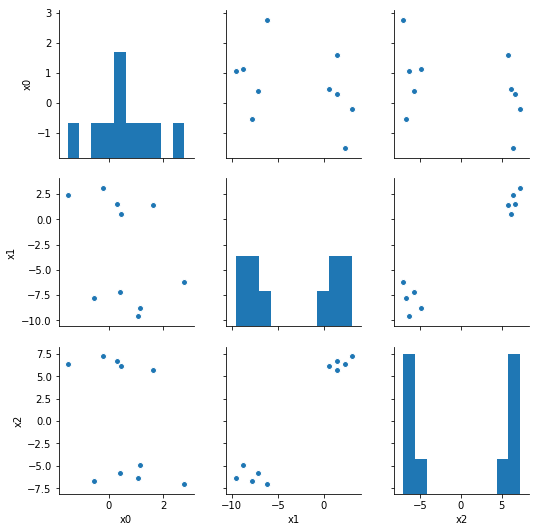

In [33]:
sns.pairplot(X_df);

In [50]:
Sigma_C = np.cov(X, rowvar=False, ddof=0)
Sigma_C

array([[  1.27658509,  -2.01624108,  -2.82448555],
       [ -2.01624108,  24.4016282 ,  30.34727518],
       [ -2.82448555,  30.34727518,  40.09304972]])

In [75]:
((X-X.mean(axis=0)).T @ (X-X.mean(axis=0))) / n

array([[  1.27658509,  -2.01624108,  -2.82448555],
       [ -2.01624108,  24.4016282 ,  30.34727518],
       [ -2.82448555,  30.34727518,  40.09304972]])

In [98]:
E_C, V_C = eig(Sigma_C)
Sigma_recon = V_C @ np.diag(E_C) @ V_C.T
Sigma_recon - Sigma_C

array([[ -1.33226763e-15+0.j,   1.06581410e-14+0.j,   1.50990331e-14+0.j],
       [  1.06581410e-14+0.j,  -3.19744231e-14+0.j,  -3.55271368e-14+0.j],
       [  1.55431223e-14+0.j,  -3.55271368e-14+0.j,  -4.26325641e-14+0.j]])

In [97]:
E_Ch, V_Ch = eigh(Sigma_C)
Sigma_reconh = V_Ch @ np.diag(E_Ch) @ V_Ch.T
Sigma_reconh - Sigma_C

array([[ -2.22044605e-16,  -2.22044605e-15,  -2.66453526e-15],
       [ -2.22044605e-15,  -1.42108547e-14,  -1.06581410e-14],
       [ -2.66453526e-15,  -7.10542736e-15,  -7.10542736e-15]])